In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Images Segmentation with kmeans

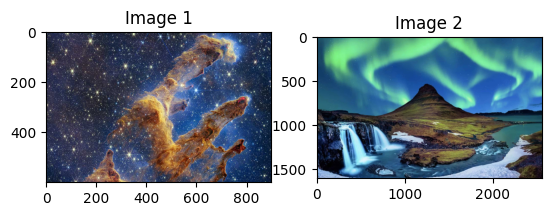

In [2]:
img1 = cv2.imread('galaxy.jpg')
img2 = cv2.imread('aurore.jpg')
# Conversion to RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Displaying the original images
plt.subplot(2,2,1),plt.imshow(img1,vmin=0, vmax=255),plt.title('Image 1')
plt.subplot(2,2,2),plt.imshow(img2,vmin=0, vmax=255),plt.title('Image 2')
plt.show()

In [3]:
Y = img1.reshape((-1,3))
# Convert the image into a matrix of floats with all the points
Y = np.float32(Y)

Z = img2.reshape((-1,3))
# Convert the image into a matrix of floats with all the points
Z = np.float32(Z)

In [4]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0) # Configuration
N = 11

# We will vary the number of clusters between 2 and 10

ret1 = []; label1 = []; center1 = []
ret2 = []; label2 = []; center2 = []
for i in range (2,N):
    ret1temp,label1temp,center1temp=cv2.kmeans(Y,i,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    ret2temp,label2temp,center2temp=cv2.kmeans(Z,i,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    ret1.append(ret1temp); label1.append(label1temp); center1.append(center1temp)
    ret2.append(ret2temp); label2.append(label2temp); center2.append(center2temp)

Functions to adjust the final color

In [5]:
def separation_of_clusters(Img, K, label):
    # Retrieve the dimensions of the image
    height, width = Img.shape[:2]

    # Create a list of empty arrays to store the pixels of each cluster
    cluster_pixels = [[] for _ in range(K)]

    # Traverse the label matrix for each pixel
    for i in range(height):
        labeltemp = label[i] # Retrieve the label of the pixel
        cluster_pixels[labeltemp.item()].append(Img[i])

    # Now, cluster_pixels[0] contains the pixels of the first cluster
    # cluster_pixels[1] contains the pixels of the second cluster, and so on

    return cluster_pixels

def find_median_color(cluster_pixels):
    # Transpose the list of pixels to get the values of each color component separately
    cluster_pixels = np.array(cluster_pixels).T

    # Calculate the median value for each color component
    median_color = [int(np.median(component)) for component in cluster_pixels]

    return median_color


def find_mean_color(cluster_pixels):
    # Calculate the mean of each color component (R, G, B)
    mean_color = np.mean(cluster_pixels, axis=0).astype(int)
    return mean_color

def replace_by_median_color(Img, K, label):
    num_points, width = Img.shape[:2]
    Imgtemp = np.zeros((num_points,3))
    clustered_pixels = separation_of_clusters(Img, K, label)
    for i in range(0,K):
        median_color = find_median_color(clustered_pixels[i])
        for j in range (0,num_points):
            if label[j] == i:
                Imgtemp[j] = median_color
    return Imgtemp

def replace_by_mean_color(Img, K, label):
    num_points, width = Img.shape[:2]
    Imgtemp = np.zeros((num_points,3))
    clustered_pixels = separation_of_clusters(Img, K, label)
    for i in range(0,K):
        mean_color = find_mean_color(clustered_pixels[i])
        for j in range (0,num_points):
            if label[j] == i:
                Imgtemp[j] = mean_color
    return Imgtemp

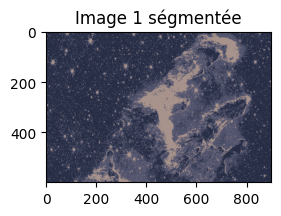

In [6]:
image_reconvertie1temp = replace_by_median_color(Y, 0+3, label1[1])
image_reconvertie1temp = image_reconvertie1temp.astype(np.uint8)
image_reconvertie1temp = image_reconvertie1temp.reshape(img1.shape)
plt.subplot(2,2,1),plt.imshow(image_reconvertie1temp,vmin=0, vmax=255),plt.title('Image 1 ségmentée')
plt.show()

In [7]:
image_reconvertie1= []
image_reconvertie2= []

for i in range (0,N-2):
    print({i+2})
    image_reconvertie1temp = replace_by_median_color(Y, i+2, label1[i])
    image_reconvertie2temp = replace_by_median_color(Z, i+2, label2[i])
    # Convert the image format (if necessary)
    image_reconvertie1temp = image_reconvertie1temp.astype(np.uint8)
    image_reconvertie2temp = image_reconvertie2temp.astype(np.uint8)
    # Restore the shape of the image to its original form (if it has been flattened)
    image_reconvertie1temp = image_reconvertie1temp.reshape(img1.shape)
    image_reconvertie2temp = image_reconvertie2temp.reshape(img2.shape)
    image_reconvertie1 = image_reconvertie1 + [image_reconvertie1temp] 
    image_reconvertie2 = image_reconvertie2 + [image_reconvertie2temp]

{2}
{3}
{4}


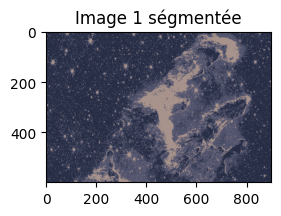

In [8]:
plt.subplot(2,2,1),plt.imshow(image_reconvertie1[1],vmin=0, vmax=255),plt.title('Image 1 ségmentée')
plt.show()

IndexError: list index out of range

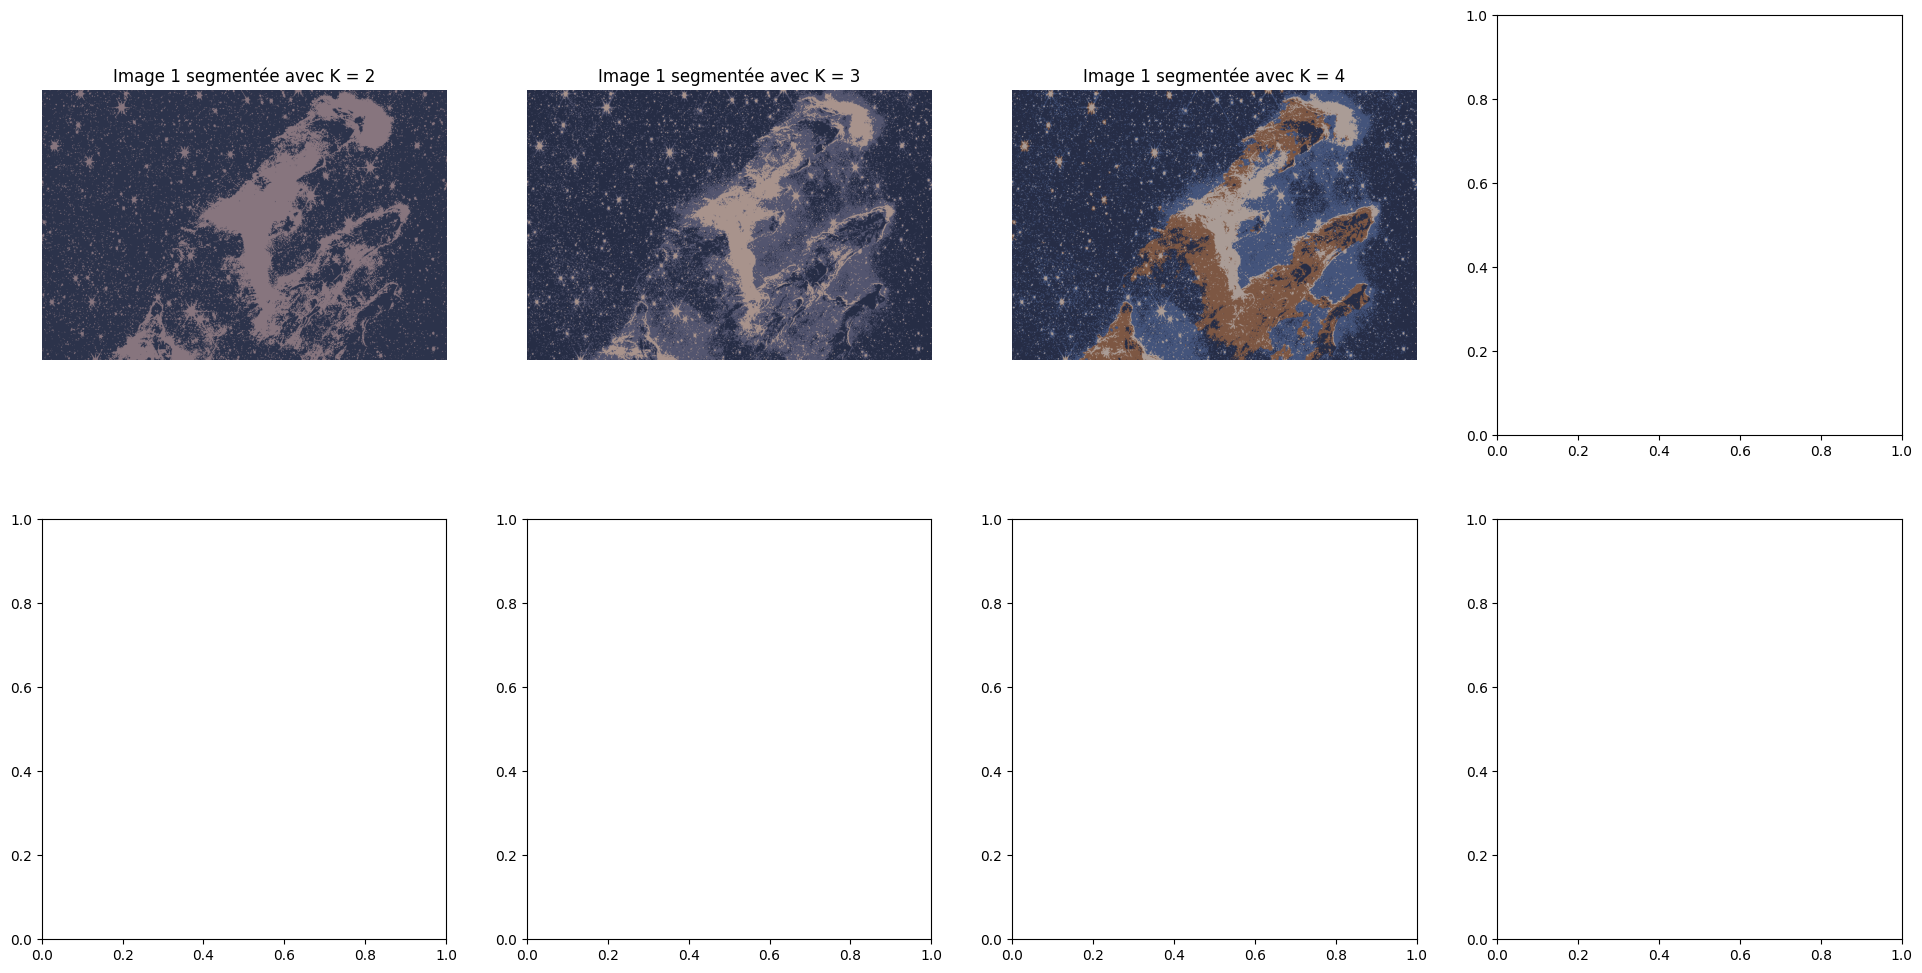

In [9]:
fig, axs = plt.subplots(2, 4, figsize=(24, 12))

# Browse through the images and subplots to display them
for i, ax in enumerate(axs.flat):
    ax.imshow(image_reconvertie1[i])  # Display the current image on the current subplot
    ax.axis('off')  # Disable the axes
    ax.set_title(f"Image 1 segmented with K = {i+2}", fontsize=12)

plt.subplots_adjust(top=0.9, bottom=0.5)

# Display the figure
plt.show()



IndexError: list index out of range

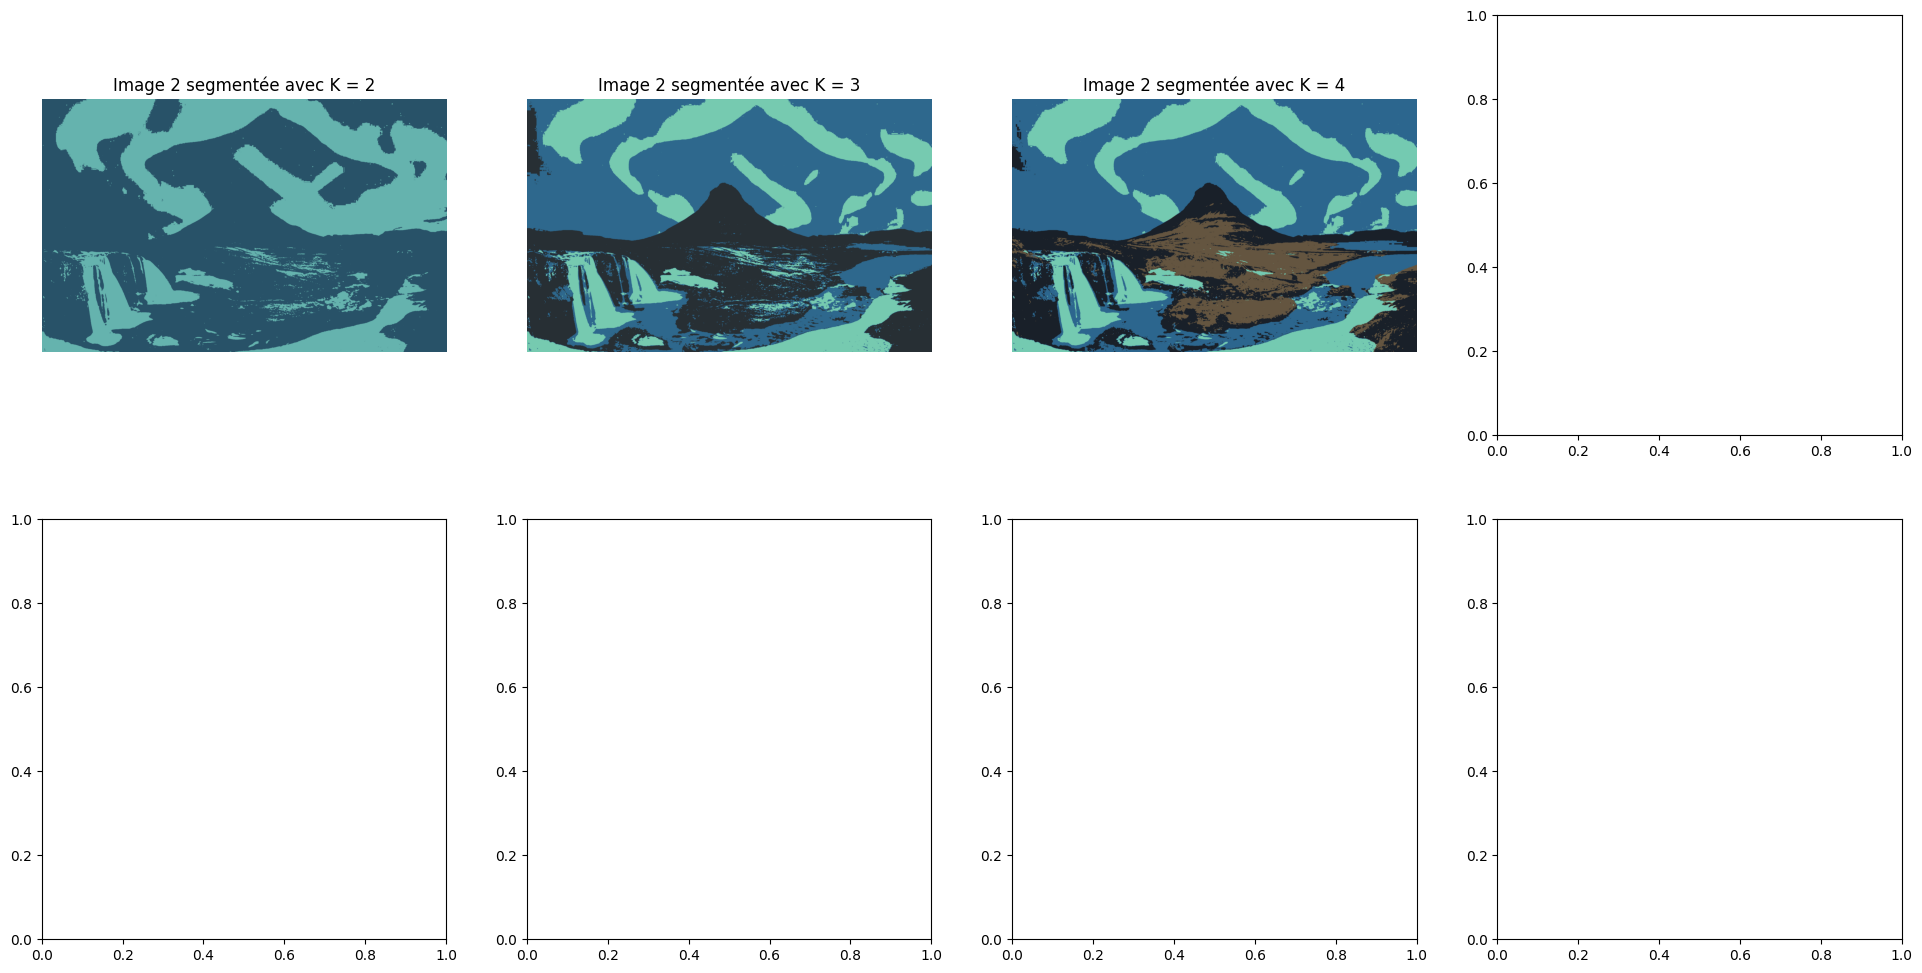

In [10]:
fig, axs = plt.subplots(2, 4, figsize=(24, 12))

# Browse through the images and subplots to display them
for i, ax in enumerate(axs.flat):
    ax.imshow(image_reconvertie2[i])  # Display the current image on the current subplot
    ax.axis('off')  # Disable the axes
    ax.set_title(f"Image 1 segmented wirh K = {i+2}", fontsize=12)

plt.subplots_adjust(top=0.9, bottom=0.5)

# Display the figure
plt.show()


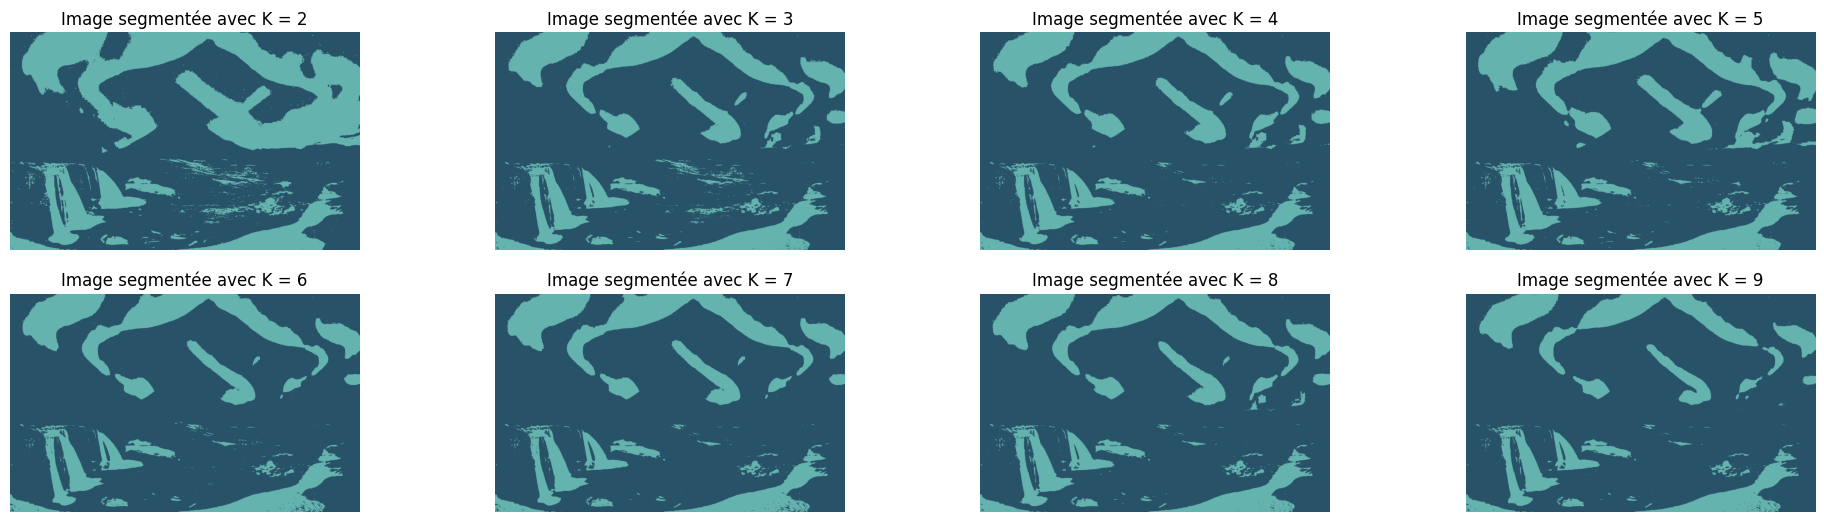

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(24, 12))

# Parcourez les images et les sous-tracés pour les afficher
for i, ax in enumerate(axs.flat):
    ax.imshow(image_reconvertie2[i])  # Affichez l'image actuelle sur le sous-tracé actuel
    ax.axis('off')  # Désactivez les axes
    ax.set_title(f"Image segmentée avec K = {i+2}", fontsize=12)

plt.subplots_adjust(top=0.9, bottom=0.5)

# Affichez la figure
plt.show()

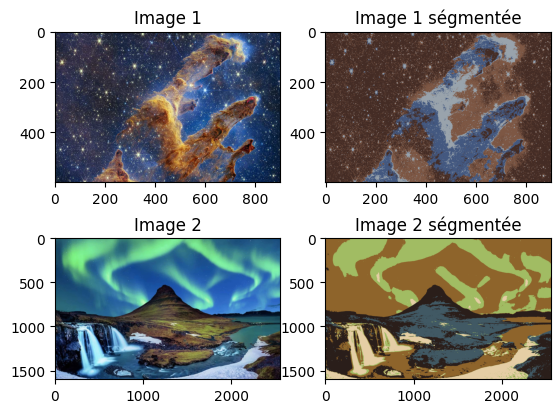

In [ ]:
center1 = np.uint8(center1)
resultat1 = center1[label1.flatten()]
resultat1 = resultat1 .reshape((img1.shape))

center2 = np.uint8(center2)
resultat2 = center2[label2.flatten()]
resultat2 = resultat2 .reshape((img2.shape))

# Reconversion pour affichage correcte

image_reconvertie1=cv2.cvtColor(resultat1,cv2.COLOR_BGR2RGB) 
image_reconvertie2=cv2.cvtColor(resultat2,cv2.COLOR_BGR2RGB) 

#plt.imshow(image_reconvertie) ; plt.show() 

# Affichage avec matplotlib.pyplot

# groupes créés

plt.subplot(2,2,1),plt.imshow(img1,vmin=0, vmax=255),plt.title('Image 1')
plt.subplot(2,2,2),plt.imshow(image_reconvertie1,vmin=0, vmax=255),plt.title('Image 1 ségmentée')
plt.subplot(2,2,3),plt.imshow(img2,vmin=0, vmax=255),plt.title('Image 2')
plt.subplot(2,2,4),plt.imshow(image_reconvertie2,vmin=0, vmax=255),plt.title('Image 2 ségmentée')
plt.show()
#print(np.unique(label.flatten()))